In [153]:
import pandas as pd
import networkx as nx
import numpy as np

In [154]:
df = pd.read_csv('news.csv')

In [155]:
df.rename(columns={'Unnamed: 0': 'ID', 'class': 'label'}, inplace=True)
df.drop(['date'], axis=1, inplace=True)

In [156]:
df.columns

Index(['ID', 'news', 'subject', 'month', 'day', 'year', 'label'], dtype='object')

In [157]:
sample = df[0:500]

In [158]:
sample.columns

Index(['ID', 'news', 'subject', 'month', 'day', 'year', 'label'], dtype='object')

In [159]:
sample

ID                                               news   subject  month  \
0      0  white house presses congress on bill allowing ...  politics      9   
1      1  china urges cooperation after us brands it a c...  politics     12   
2      2   cleveland school officer placed on leave afte...  politics      1   
3      3  syrian democratic forces say reach deir alzor ...  politics      9   
4      4  senator talks all night as democrats fight tru...  politics      4   
..   ...                                                ...       ...    ...   
495  495   donald trump just announced another position ...  politics      8   
496  496  boiler room ep 52 never ending chaos tune in t...  politics      4   
497  497   trump just got destroyed by one of america’s ...  politics      6   
498  498  labor activists target midwest politicians opp...  politics      9   
499  499  brazil's temer signs tax renegotiation program...  politics     10   

     day  year  label  
0     21  2016      1  
1     19  2017      1  
2      8  2016      0  
3     10  2017      1  
4      5  2017      1  
..   ...   ...    ...  
495   10  2017      0  
496   13  2016      0  
497    2  2016      0  
498    2  2017      1  
499   24  2017      1  

[500 rows x 7 columns]

In [160]:
#import nltk

In [161]:
#nltk.download('punkt')
#nltk.download('wordnet')

In [162]:
#from nltk.stem import WordNetLemmatizer
#lemmatizer = WordNetLemmatizer()

In [163]:
'''
for index,row in sample.iterrows():
    filter_sentence = ''
    
    sentence = row['news']
    
    words = nltk.word_tokenize(sentence)#tokenization
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()#lemmatization
        
    df.loc[index, 'news'] = filter_sentence
'''

"\nfor index,row in sample.iterrows():\n    filter_sentence = ''\n    \n    sentence = row['news']\n    \n    words = nltk.word_tokenize(sentence)#tokenization\n    \n    for word in words:\n        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()#lemmatization\n        \n    df.loc[index, 'news'] = filter_sentence\n"

In [164]:
sample['label'].value_counts()

label
1    266
0    234
Name: count, dtype: int64

In [165]:
graph_original = nx.Graph()

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_features = tfidf_vectorizer.fit_transform(sample['news'])

for idx, row in sample.iterrows():
    feature_tfidf_scores = tfidf_features[idx].toarray()[0]
    
    # Pair feature indices with their TF-IDF scores
    features_with_scores = list(enumerate(feature_tfidf_scores))
    
    # Sort the features based on their TF-IDF scores in descending order
    top_features = sorted(features_with_scores, key=lambda x: x[1], reverse=True)
    
    # Select the top 100 most prominent features
    necessary_features = top_features[:200]

    #necessary_features = np.array(necessary_features).ravel()
    
    node_attrs = {
        'content': necessary_features,
        'month': row['month'],
        'day': row['day'],
        'year': row['year'],
    }
    graph_original.add_node(row['ID'], label=row['label'], **node_attrs)

In [167]:
for node, attrs in graph_original.nodes(data=True):
    print(f"Node {node}:")
    for attr_name, attr_value in attrs.items():
        print(f"{attr_name} : {attr_value}")

Node 0:
label : 1
content : [(17646, 0.3352373444374478), (5686, 0.2674787433887551), (4034, 0.19252621372730352), (8194, 0.17863126120682704), (16045, 0.17831916225917005), (8608, 0.16337210688182172), (8201, 0.15324464135184115), (14558, 0.15324464135184115), (18060, 0.15089533860323867), (1654, 0.15047750554820813), (10424, 0.13586345844835), (14878, 0.13423222910459423), (6493, 0.12468830288098101), (11449, 0.12362868239773185), (14449, 0.12304321691771353), (12785, 0.11553943763730665), (46, 0.10372952001819875), (15640, 0.10372952001819875), (17648, 0.10372952001819875), (18388, 0.100372298337203), (5032, 0.09728221935139199), (11830, 0.09728221935139199), (11831, 0.09728221935139199), (14834, 0.09531372293210146), (10483, 0.09484945191415006), (4611, 0.09270778672955479), (5963, 0.09270778672955479), (9734, 0.09270778672955479), (10185, 0.09270778672955479), (12765, 0.09270778672955479), (12787, 0.09270778672955479), (15476, 0.09270778672955479), (15583, 0.09270778672955479), (1

In [168]:
print(tfidf_features[0][0,1000])

0.0


In [169]:
for node, attrs in graph_original.nodes(data=True):
    if 'label' not in attrs:
        print(f"Node {node}")# Edges between same and different categories

In [170]:
from sklearn.metrics.pairwise import cosine_similarity

In [171]:
import matplotlib.pyplot as plt

In [172]:
graph_same = graph_original.copy()
graph_same_different = graph_original.copy()

# Edges between same categories only

In [173]:
total=0
graph_same.remove_edges_from(list(graph_same.edges()))
for i in range(len(sample)):
    print("\nFor node ", i, ":\n")
    n=1
    for j in range(i+1, len(sample)):
        # Check if the categories of nodes i and j are the same
        if sample.iloc[i]['label'] == sample.iloc[j]['label']:
            # Access TF-IDF vectors of nodes i and j from the graph
            tfidf_vector_i = graph_same.nodes[sample.iloc[i]['ID']]['content']
            tfidf_vector_j = graph_same.nodes[sample.iloc[j]['ID']]['content']

            #tfidf_vector_i = np.atleast_2d(tfidf_vector_i)
            #tfidf_vector_j = np.atleast_2d(tfidf_vector_j)

            tfidf_vector_i_flat = np.array(tfidf_vector_i).ravel()
            tfidf_vector_j_flat = np.array(tfidf_vector_j).ravel()
            
            # Calculate cosine similarity between TF-IDF vectors of nodes i and j
            similarity_score = cosine_similarity([tfidf_vector_i_flat], [tfidf_vector_j_flat])[0][0]

            
            # Define a threshold to create edges only for pairs with similarity above a certain threshold
            threshold = 0.5
            if similarity_score > threshold:
                print(n, " ", j, " ", similarity_score)
                n=n+1
                total=total+1
                # Add an edge between nodes i and j with the similarity score as an edge attribute
                graph_same.add_edge(sample.iloc[i]['ID'], sample.iloc[j]['ID'], weight=similarity_score)
print("Total: ", total)



For node  0 :

1   1   0.62798059612475
2   3   0.5286009490781941
3   4   0.5949481234538105
4   7   0.6607174432972034
5   10   0.5874830739930583
6   12   0.557836307943665
7   13   0.6241381740304335
8   18   0.6061828020895799
9   21   0.5750739396054052
10   22   0.5315512159950562
11   24   0.593524632117236
12   25   0.7215434973238768
13   26   0.5731532865664697
14   28   0.5704916620490348
15   30   0.6015072755831792
16   33   0.6169276049508723
17   35   0.5104289505920638
18   36   0.591245229519872
19   37   0.5895265363124068
20   39   0.5162336306984778
21   41   0.5620239589899392
22   46   0.6735367726392896
23   47   0.553516800185275
24   48   0.5438039957163487
25   49   0.6519468890038209
26   50   0.5244710289588499
27   51   0.5105007511861112
28   55   0.6438451658757182
29   56   0.6010600421564255
30   57   0.5720249652342153
31   63   0.5057438843782752
32   64   0.6832535197787833
33   66   0.5363623960950525
34   68   0.6235354406347595
35   71   0.57968

In [174]:
for u, v, weight in graph_same.edges(data='weight'):
    print(f"Edge: {u}-{v}, Weight: {weight}")

Edge: 0-1, Weight: 0.62798059612475
Edge: 0-3, Weight: 0.5286009490781941
Edge: 0-4, Weight: 0.5949481234538105
Edge: 0-7, Weight: 0.6607174432972034
Edge: 0-10, Weight: 0.5874830739930583
Edge: 0-12, Weight: 0.557836307943665
Edge: 0-13, Weight: 0.6241381740304335
Edge: 0-18, Weight: 0.6061828020895799
Edge: 0-21, Weight: 0.5750739396054052
Edge: 0-22, Weight: 0.5315512159950562
Edge: 0-24, Weight: 0.593524632117236
Edge: 0-25, Weight: 0.7215434973238768
Edge: 0-26, Weight: 0.5731532865664697
Edge: 0-28, Weight: 0.5704916620490348
Edge: 0-30, Weight: 0.6015072755831792
Edge: 0-33, Weight: 0.6169276049508723
Edge: 0-35, Weight: 0.5104289505920638
Edge: 0-36, Weight: 0.591245229519872
Edge: 0-37, Weight: 0.5895265363124068
Edge: 0-39, Weight: 0.5162336306984778
Edge: 0-41, Weight: 0.5620239589899392
Edge: 0-46, Weight: 0.6735367726392896
Edge: 0-47, Weight: 0.553516800185275
Edge: 0-48, Weight: 0.5438039957163487
Edge: 0-49, Weight: 0.6519468890038209
Edge: 0-50, Weight: 0.5244710289588

In [175]:
label_colors = {
    1: 'green',
    0: 'yellow'
}

# Iterate through nodes and assign colors based on the 'label' attribute
node_colors = []
for node in graph_same.nodes():
    if 'label' in graph_same.nodes[node]:
        label = graph_same.nodes[node]['label']
        color = label_colors.get(label, 'gray')  # Default to gray for unknown labels
        node_colors.append(color)
    else:
        node_colors.append('gray')  # Default to gray for nodes without a 'label' attribute

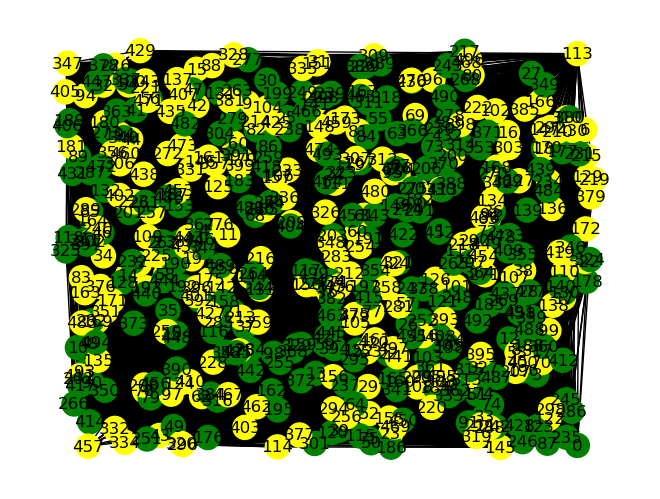

In [176]:
nx.draw_random(graph_same, with_labels=True, node_color=node_colors)
plt.show()

# Edges between same and different categories

In [117]:
total=0
graph_same_different.remove_edges_from(list(graph_same_different.edges()))
for i in range(len(sample)):
    print("\nFor node ", i, ":\n")
    n=1
    for j in range(i+1, len(sample)):
        # Access TF-IDF vectors of nodes i and j from the graph
        tfidf_vector_i = graph_same_different.nodes[sample.iloc[i]['ID']]['content']
        tfidf_vector_j = graph_same_different.nodes[sample.iloc[j]['ID']]['content']

        #tfidf_vector_i = np.atleast_2d(tfidf_vector_i)
        #tfidf_vector_j = np.atleast_2d(tfidf_vector_j)

        tfidf_vector_i_flat = np.array(tfidf_vector_i).ravel()
        tfidf_vector_j_flat = np.array(tfidf_vector_j).ravel()
            
        # Calculate cosine similarity between TF-IDF vectors of nodes i and j
        similarity_score = cosine_similarity([tfidf_vector_i_flat], [tfidf_vector_j_flat])[0][0]

            
        # Define a threshold to create edges only for pairs with similarity above a certain threshold
        threshold = 0.5
        if similarity_score > threshold:
            print(n, " ", j, " ", similarity_score)
            n=n+1
            total=total+1
            # Add an edge between nodes i and j with the similarity score as an edge attribute
            graph_same_different.add_edge(sample.iloc[i]['ID'], sample.iloc[j]['ID'], weight=similarity_score)
print("Total: ", total)



For node  0 :

1   1   0.5648897573931413
2   2   0.5791731396404489
3   3   0.5029229814904352
4   4   0.5158742147651763
5   5   0.5337073115076276
6   6   0.6540190732072988
7   7   0.6018559649605241
8   10   0.6122219573822967
9   11   0.7295501386741869
10   13   0.5936759066523075
11   14   0.5436557586047077
12   15   0.590020527952674
13   16   0.5620382315021075
14   17   0.6517495068940357
15   18   0.571978806455155
16   19   0.8075286548613834
17   20   0.7186966007251286
18   21   0.5571638029765453
19   22   0.5332896081572518
20   23   0.7274883089979983
21   24   0.5014817377739184
22   25   0.7143147477365668
23   26   0.604990172750721
24   28   0.528900012696504
25   30   0.5033329428862976
26   31   0.6613446324249921
27   32   0.6449951351594738
28   33   0.6197906931464903
29   34   0.6714184330738002
30   36   0.5523498886706764
31   37   0.596024090176969
32   38   0.6048853208375837
33   40   0.6113695030317976
34   43   0.6079225117289078
35   44   0.6232854

In [118]:
for u, v, weight in graph_same_different.edges(data='weight'):
    print(f"Edge: {u}-{v}, Weight: {weight}")

Edge: 0-1, Weight: 0.5648897573931413
Edge: 0-2, Weight: 0.5791731396404489
Edge: 0-3, Weight: 0.5029229814904352
Edge: 0-4, Weight: 0.5158742147651763
Edge: 0-5, Weight: 0.5337073115076276
Edge: 0-6, Weight: 0.6540190732072988
Edge: 0-7, Weight: 0.6018559649605241
Edge: 0-10, Weight: 0.6122219573822967
Edge: 0-11, Weight: 0.7295501386741869
Edge: 0-13, Weight: 0.5936759066523075
Edge: 0-14, Weight: 0.5436557586047077
Edge: 0-15, Weight: 0.590020527952674
Edge: 0-16, Weight: 0.5620382315021075
Edge: 0-17, Weight: 0.6517495068940357
Edge: 0-18, Weight: 0.571978806455155
Edge: 0-19, Weight: 0.8075286548613834
Edge: 0-20, Weight: 0.7186966007251286
Edge: 0-21, Weight: 0.5571638029765453
Edge: 0-22, Weight: 0.5332896081572518
Edge: 0-23, Weight: 0.7274883089979983
Edge: 0-24, Weight: 0.5014817377739184
Edge: 0-25, Weight: 0.7143147477365668
Edge: 0-26, Weight: 0.604990172750721
Edge: 0-28, Weight: 0.528900012696504
Edge: 0-30, Weight: 0.5033329428862976
Edge: 0-31, Weight: 0.66134463242499

In [119]:
label_colors = {
    1: 'green',
    0: 'red'
}

# Iterate through nodes and assign colors based on the 'label' attribute
node_colors = []
for node in graph_same_different.nodes():
    if 'label' in graph_same_different.nodes[node]:
        label = graph_same_different.nodes[node]['label']
        color = label_colors.get(label, 'gray')  # Default to gray for unknown labels
        node_colors.append(color)
    else:
        node_colors.append('gray')  # Default to gray for nodes without a 'label' attribute

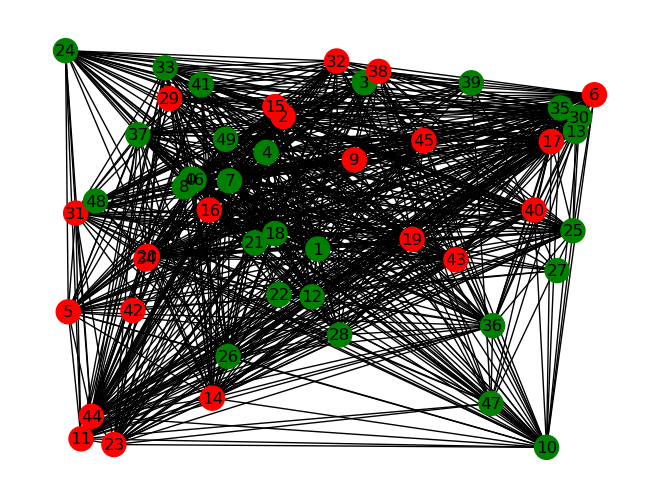

In [120]:
nx.draw_random(graph_same_different, with_labels=True, node_color=node_colors)
plt.show()

# Model Building

In [177]:
import torch

from torch_geometric.loader import DataLoader
from torch_geometric.data import Data

In [178]:
# Node features
all_node_features = []
labels_list = []

for node, content in graph_same.nodes(data=True):
    all_node_features.append(content.get('content'))
    labels_list.append(content.get('label'))

tensor_all_node_features = torch.tensor(all_node_features, dtype=torch.float)
labels = torch.tensor(labels_list, dtype=torch.long)


In [179]:
all_edge_features = []

for u, v, weight in graph_same.edges(data='weight'):
    #print(f"Edge: {u}-{v}, Weight: {weight}")
    all_edge_features.append(weight)

edge_attr = torch.tensor(all_edge_features, dtype=torch.float)

In [180]:
edges = [(edge[0], edge[1]) for edge in graph_same.edges]
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

In [181]:
x_new = tensor_all_node_features.view(500,-1)

In [182]:
data = Data(x=x_new, edge_index=edge_index, edge_attr=edge_attr, y=labels)

In [183]:
# Accessing node features
print("Node features:")
print(data.x.shape)
print(data.x)

# Accessing edge indices
print("\nEdge indices:")
print(data.edge_index.shape)
print(data.edge_index)

# Accessing edge features (if available)
if data.edge_attr is not None:
    print("\nEdge features:")
    print(data.edge_attr.shape)
    print(data.edge_attr)

# Accessing node labels
if data.y is not None:
    print("\nNode labels:")
    print(data.y.shape)
    print(data.y)


Node features:
torch.Size([500, 400])
tensor([[1.7646e+04, 3.3524e-01, 5.6860e+03,  ..., 0.0000e+00, 8.5000e+01,
         0.0000e+00],
        [3.4350e+03, 7.0939e-01, 7.3550e+03,  ..., 0.0000e+00, 3.0000e+00,
         0.0000e+00],
        [3.4860e+03, 4.1403e-01, 3.5900e+03,  ..., 0.0000e+00, 2.8000e+01,
         0.0000e+00],
        ...,
        [9.2170e+03, 3.1892e-01, 1.2785e+04,  ..., 0.0000e+00, 5.8000e+01,
         0.0000e+00],
        [1.7811e+04, 4.8539e-01, 1.0668e+04,  ..., 2.5711e-02, 1.2505e+04,
         2.5711e-02],
        [1.2941e+04, 3.3843e-01, 1.3443e+04,  ..., 0.0000e+00, 1.5400e+02,
         0.0000e+00]])

Edge indices:
torch.Size([2, 42474])
tensor([[  0,   0,   0,  ..., 495, 495, 496],
        [  1,   3,   4,  ..., 496, 497, 497]])

Edge features:
torch.Size([42474])
tensor([0.6280, 0.5286, 0.5949,  ..., 0.7452, 0.7015, 0.7743])

Node labels:
torch.Size([500])
tensor([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 0

In [184]:
from torch_geometric.nn import global_max_pool as gmp
from torch_geometric.nn import GATConv
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

In [185]:
class GCN(torch.nn.Module):
    def __init__(self, num_node_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, 16)
        self.conv2 = GCNConv(16, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Instantiate the model
num_node_features = data.x.shape[1]
num_classes = len(torch.unique(labels))
model = GCN(num_node_features, num_classes)

In [186]:
from sklearn.model_selection import train_test_split

train_indices, val_indices = train_test_split(range(len(labels)), test_size=0.2, stratify=labels)

# Reindex the edges to ensure they refer to the correct subset of nodes
def reindex_edges(edge_index, indices):
    index_map = {old_idx: new_idx for new_idx, old_idx in enumerate(indices)}
    new_edge_index = edge_index.clone()
    for i in range(edge_index.size(1)):
        new_edge_index[0, i] = index_map.get(edge_index[0, i].item(), -1)
        new_edge_index[1, i] = index_map.get(edge_index[1, i].item(), -1)
    valid_edges = (new_edge_index[0] != -1) & (new_edge_index[1] != -1)
    return new_edge_index[:, valid_edges]

# Create Data objects for train and validation sets
train_edge_index = reindex_edges(edge_index, train_indices)
val_edge_index = reindex_edges(edge_index, val_indices)

train_data = Data(x=data.x[train_indices], edge_index=train_edge_index, edge_attr=edge_attr, y=labels[train_indices])
val_data = Data(x=data.x[val_indices], edge_index=val_edge_index, edge_attr=edge_attr, y=labels[val_indices])

In [187]:
train_loader = DataLoader([train_data], batch_size=1, shuffle=True)
val_loader = DataLoader([val_data], batch_size=1, shuffle=False)

In [188]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

def train():
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        out = model(batch)
        loss = F.nll_loss(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

In [189]:
def validate():
    model.eval()
    correct = 0
    for batch in val_loader:
        out = model(batch)
        pred = out.argmax(dim=1)
        correct += int((pred == batch.y).sum())
    return correct / len(val_loader.dataset)

In [190]:
for epoch in range(1200):  # Adjust the number of epochs as needed
    train_loss = train()
    val_accuracy = validate()
    print(f'Epoch {epoch+1}, Loss: {train_loss:.9f}, Validation Accuracy: {val_accuracy:.9f}')

Epoch 1, Loss: 6104.697265625, Validation Accuracy: 53.000000000
Epoch 2, Loss: 16199.619140625, Validation Accuracy: 51.000000000
Epoch 3, Loss: 3534.818847656, Validation Accuracy: 47.000000000
Epoch 4, Loss: 16264.093750000, Validation Accuracy: 46.000000000
Epoch 5, Loss: 11181.223632812, Validation Accuracy: 45.000000000
Epoch 6, Loss: 174.762161255, Validation Accuracy: 53.000000000
Epoch 7, Loss: 2683.410644531, Validation Accuracy: 53.000000000
Epoch 8, Loss: 3721.382568359, Validation Accuracy: 53.000000000
Epoch 9, Loss: 38.676422119, Validation Accuracy: 50.000000000
Epoch 10, Loss: 17.955051422, Validation Accuracy: 45.000000000
Epoch 11, Loss: 3882.419433594, Validation Accuracy: 46.000000000
Epoch 12, Loss: 36.113773346, Validation Accuracy: 97.000000000
Epoch 13, Loss: 28.631660461, Validation Accuracy: 55.000000000
Epoch 14, Loss: 36.622230530, Validation Accuracy: 53.000000000
Epoch 15, Loss: 340.607818604, Validation Accuracy: 55.000000000
Epoch 16, Loss: 35.652500153